<a href="https://colab.research.google.com/github/Junaid-Sk-30/Projects/blob/main/2_Top_Instagram_Influencers_Data(Cleaned).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# First upload the CSV file to Colab
from google.colab import files
uploaded = files.upload()

Saving top_insta_influencers_data.csv to top_insta_influencers_data.csv


In [ ]:
# Load the dataset
df = pd.read_csv('top_insta_influencers_data.csv')

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

<ipython-input-5-aa2c48629a6e>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-5-aa2c48629a6e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
# Function to convert k, m, b suffixes to numbers
def convert_to_numeric(val):
    if isinstance(val, str):
        if 'k' in val:
            return float(val.replace('k', '')) * 1e3
        elif 'm' in val:
            return float(val.replace('m', '')) * 1e6
        elif 'b' in val:
            return float(val.replace('b', '')) * 1e9
        elif '%' in val:
            return float(val.replace('%', ''))
    return float(val)

# Apply conversion to relevant columns
cols_to_convert = ['posts', 'followers', 'avg_likes', '60_day_eng_rate',
                  'new_post_avg_like', 'total_likes']
for col in cols_to_convert:
    df[col] = df[col].apply(convert_to_numeric)

In [ ]:
# Verify the data
print(df.head())

   rank channel_info  influence_score   posts    followers  avg_likes  \
0     1    cristiano               92  3300.0  475800000.0  8700000.0   
1     2  kyliejenner               91  6900.0  366200000.0  8300000.0   
2     3     leomessi               90   890.0  357300000.0  6800000.0   
3     4  selenagomez               93  1800.0  342700000.0  6200000.0   
4     5      therock               91  6800.0  334100000.0  1900000.0   

   60_day_eng_rate  new_post_avg_like   total_likes        country  
0             1.39          6500000.0  2.900000e+10          Spain  
1             1.62          5900000.0  5.740000e+10  United States  
2             1.24          4400000.0  6.000000e+09  United States  
3             0.97          3300000.0  1.150000e+10  United States  
4             0.20           665300.0  1.250000e+10  United States  


In [ ]:
# Summary statistics
print("Summary Statistics:")
print(df[['influence_score', 'followers', 'avg_likes',
         '60_day_eng_rate', 'new_post_avg_like']].describe())

Summary Statistics:
       influence_score     followers     avg_likes  60_day_eng_rate  \
count       200.000000  2.000000e+02  2.000000e+02       199.000000   
mean         81.820000  7.740950e+07  1.787104e+06         1.902010   
std           8.878159  7.368727e+07  2.193359e+06         3.329719   
min          22.000000  3.280000e+07  6.510000e+04         0.010000   
25%          80.000000  4.000000e+07  5.044000e+05         0.410000   
50%          84.000000  5.005000e+07  1.100000e+06         0.880000   
75%          86.000000  6.890000e+07  2.100000e+06         2.035000   
max          93.000000  4.758000e+08  1.540000e+07        26.410000   

       new_post_avg_like  
count       2.000000e+02  
mean        1.208132e+06  
std         1.858322e+06  
min         0.000000e+00  
25%         1.957500e+05  
50%         5.321500e+05  
75%         1.325000e+06  
max         1.260000e+07  


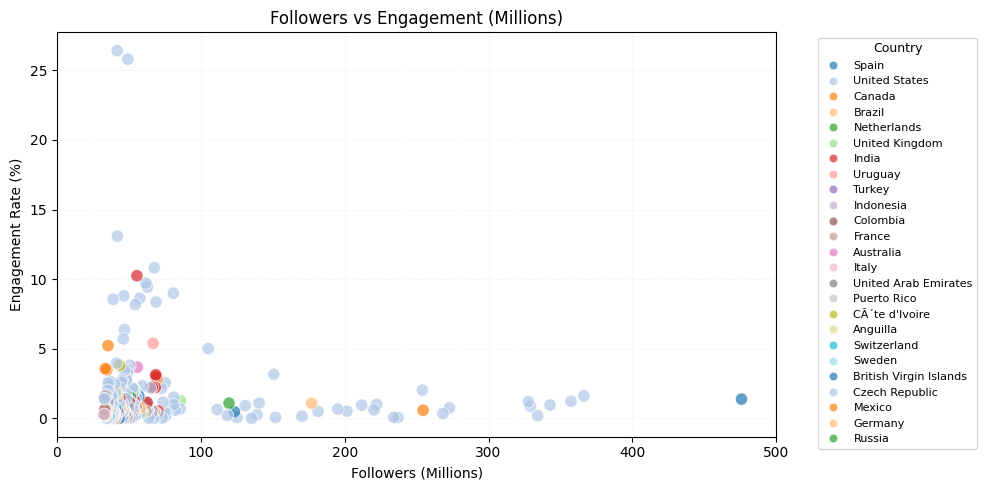

In [ ]:
plt.figure(figsize=(10, 5))  # Reduced from (14,7) to (10,5)

# Convert followers to millions
df['followers_m'] = df['followers'] / 1e6

# Create a cleaner scatter plot
scatter = sns.scatterplot(data=df, x='followers_m', y='60_day_eng_rate',
                         hue='country', palette='tab20', s=80, alpha=0.7)  # Reduced point size

# Simplified styling
plt.title('Followers vs Engagement (Millions)', fontsize=12)
plt.xlabel('Followers (Millions)', fontsize=10)
plt.ylabel('Engagement Rate (%)', fontsize=10)
plt.grid(True, linestyle=':', alpha=0.2)

# Compact legend
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left',
           fontsize=8, title_fontsize=9, markerscale=0.7)

# Optimized x-axis for the actual data range (0-500M)
plt.xticks(np.arange(0, 501, 100))
plt.xlim(0, 500)

plt.tight_layout()
plt.show()

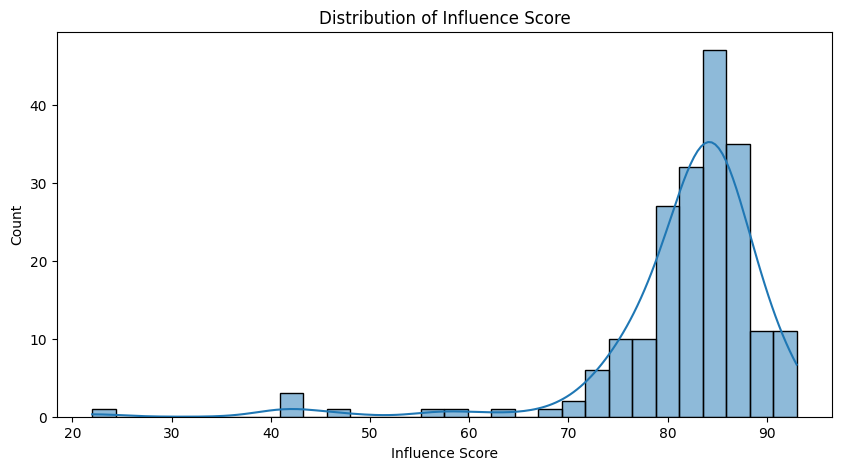

In [ ]:
# Distribution of Influence Score
plt.figure(figsize=(10, 5))
sns.histplot(df['influence_score'], bins=30, kde=True)
plt.title('Distribution of Influence Score')
plt.xlabel('Influence Score')
plt.show()

<ipython-input-11-dab263357ed1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


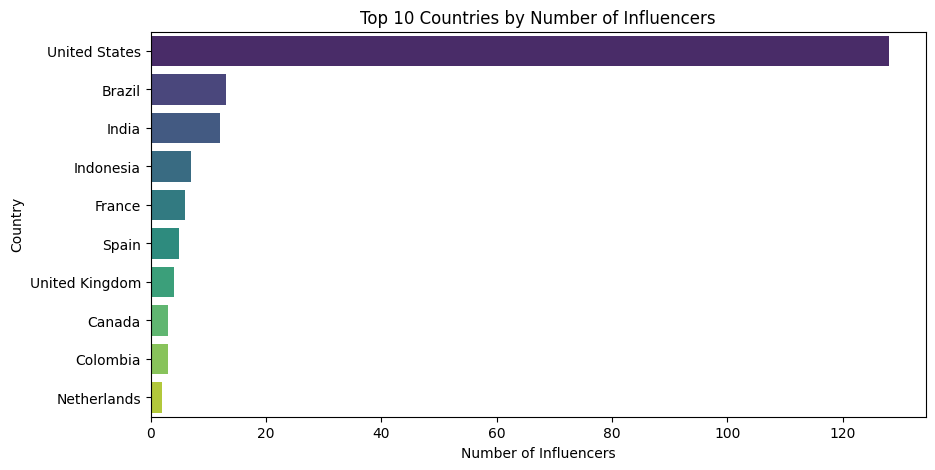

In [ ]:
# Top Countries by Number of Influencers
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of Influencers')
plt.xlabel('Number of Influencers')
plt.ylabel('Country')
plt.show()

In [ ]:
# Create new features
df['like_follower_ratio'] = df['total_likes'] / df['followers']
df['post_follower_ratio'] = df['posts'] / df['followers']
df['avg_likes_ratio'] = df['avg_likes'] / df['followers']

# Show the new features
print(df[['channel_info', 'like_follower_ratio', 'post_follower_ratio', 'avg_likes_ratio']].head())

  channel_info  like_follower_ratio  post_follower_ratio  avg_likes_ratio
0    cristiano            60.949979             0.000007         0.018285
1  kyliejenner           156.744948             0.000019         0.022665
2     leomessi            16.792611             0.000002         0.019032
3  selenagomez            33.557047             0.000005         0.018092
4      therock            37.413948             0.000020         0.005687


In [ ]:
# Define features and target
X = df[['followers', 'avg_likes', '60_day_eng_rate',
        'new_post_avg_like', 'like_follower_ratio',
        'post_follower_ratio']]
y = df['influence_score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
print(X_train.isnull().sum())  # Should be all 0
print(X_test.isnull().sum())   # Should be all 0

followers              0
avg_likes              0
60_day_eng_rate        0
new_post_avg_like      0
like_follower_ratio    0
post_follower_ratio    0
dtype: int64
followers              0
avg_likes              0
60_day_eng_rate        0
new_post_avg_like      0
like_follower_ratio    0
post_follower_ratio    0
dtype: int64


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(X_train.isnull().sum())  # Should be all 0

followers              0
avg_likes              0
60_day_eng_rate        0
new_post_avg_like      0
like_follower_ratio    0
post_follower_ratio    0
dtype: int64


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=500,         # More trees
    learning_rate=0.01,       # Lower LR for stable learning
    max_depth=10,             # Deeper trees capture more patterns
    subsample=0.9,            # Use 90% of data per tree (prevent overfitting)
    colsample_bytree=0.9,     # Use 90% of features per tree
    reg_alpha=0.1,            # L1 Regularization (remove useless features)
    reg_lambda=0.5,           # L2 Regularization (reduce overfitting)
    random_state=42
)

# Train model
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Fixed MSE: {mse:.2f}")
print(f"Fixed R² Score: {r2:.4f}")  # Closer to 1 is better

Fixed MSE: 169.83
Fixed R² Score: -0.0045


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_scaled, y_train, scoring='r2', cv=5)  # 5-fold CV
print(f"Mean R² Score (Cross-Validation): {scores.mean():.4f}")

Mean R² Score (Cross-Validation): -0.1964


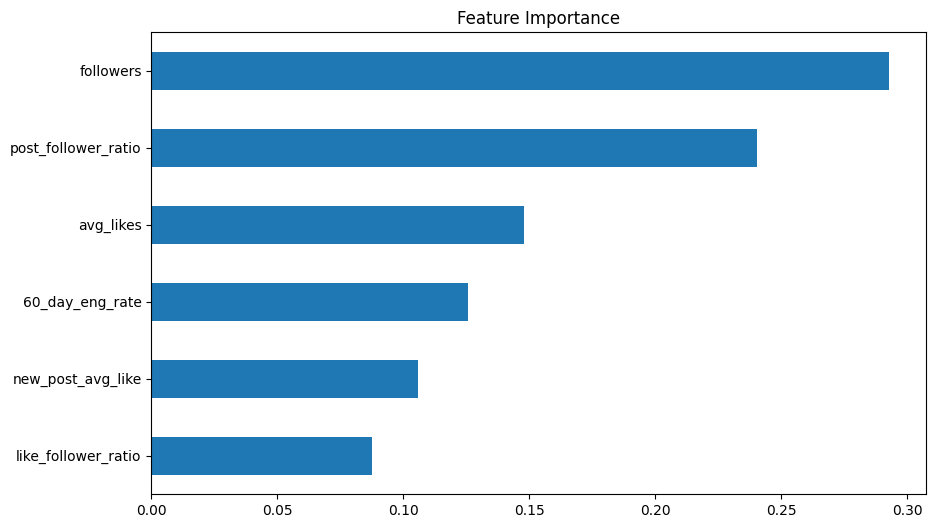

In [ ]:
# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()

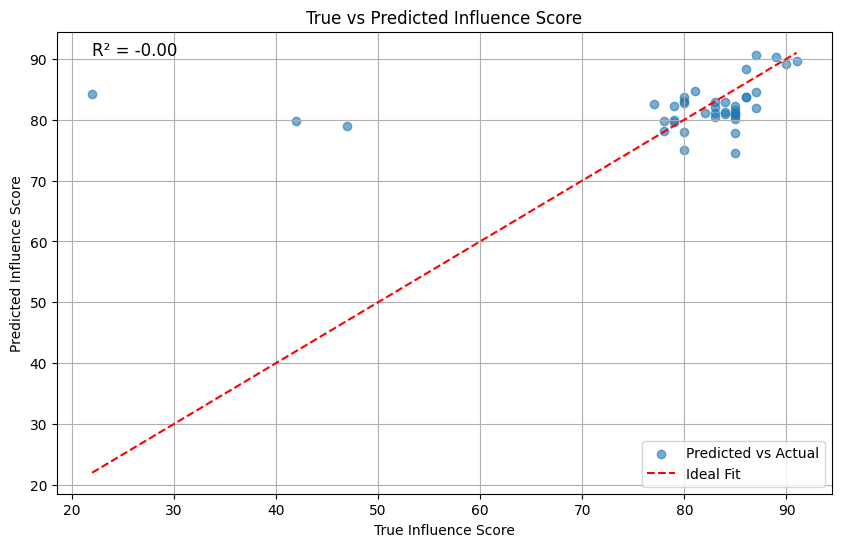

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label="Ideal Fit")

# Add R² score for better interpretation
r2 = r2_score(y_test, y_pred)
plt.text(min(y_test), max(y_pred), f'R² = {r2:.2f}', fontsize=12, color='black')

plt.xlabel('True Influence Score')
plt.ylabel('Predicted Influence Score')
plt.title('True vs Predicted Influence Score')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Top engaging influencers by country
top_engaging = df.sort_values(by='60_day_eng_rate', ascending=False)
print("\nTop 5 Influencers by Engagement Rate:")
print(top_engaging[['channel_info', 'country', '60_day_eng_rate']].head(5))


Top 5 Influencers by Engagement Rate:
       channel_info        country  60_day_eng_rate
140             j.m  United States            26.41
102             thv  United States            25.80
138      badbunnypr  United States            13.09
53   tomholland2013  United States            10.83
78           karolg          India            10.25


In [ ]:
# Average engagement rate by country
avg_engagement = df.groupby('country')['60_day_eng_rate'].mean().sort_values(ascending=False)
print("\nAverage Engagement Rate by Country:")
print(avg_engagement.head(10))


Average Engagement Rate by Country:
country
Uruguay           5.400000
Mexico            4.360000
CÃ´te d'Ivoire    3.820000
Australia         3.690000
India             2.368333
Canada            2.346667
United States     2.248281
Anguilla          1.760000
Netherlands       1.310000
United Kingdom    1.037500
Name: 60_day_eng_rate, dtype: float64


In [ ]:
# Influencers with high engagement but relatively low followers
micro_influencers = df[(df['followers'] < df['followers'].median()) &
                      (df['60_day_eng_rate'] > df['60_day_eng_rate'].median())]
print("\nPotential Micro-Influencers with High Engagement:")
print(micro_influencers[['channel_info', 'followers', '60_day_eng_rate']].sort_values(
    by='60_day_eng_rate', ascending=False).head(5))


Potential Micro-Influencers with High Engagement:
    channel_info   followers  60_day_eng_rate
140          j.m  41900000.0            26.41
102          thv  49300000.0            25.80
138   badbunnypr  42100000.0            13.09
118         zayn  46500000.0             8.81
156  georginagio  39100000.0             8.56


In [ ]:
# Summary statistics
print("Summary Statistics:")
print(df[['influence_score', 'followers', 'avg_likes',
         '60_day_eng_rate', 'new_post_avg_like']].describe())

Summary Statistics:
       influence_score     followers     avg_likes  60_day_eng_rate  \
count       200.000000  2.000000e+02  2.000000e+02       200.000000   
mean         81.820000  7.740950e+07  1.787104e+06         1.896900   
std           8.878159  7.368727e+07  2.193359e+06         3.322129   
min          22.000000  3.280000e+07  6.510000e+04         0.010000   
25%          80.000000  4.000000e+07  5.044000e+05         0.410000   
50%          84.000000  5.005000e+07  1.100000e+06         0.880000   
75%          86.000000  6.890000e+07  2.100000e+06         2.032500   
max          93.000000  4.758000e+08  1.540000e+07        26.410000   

       new_post_avg_like  
count       2.000000e+02  
mean        1.208132e+06  
std         1.858322e+06  
min         0.000000e+00  
25%         1.957500e+05  
50%         5.321500e+05  
75%         1.325000e+06  
max         1.260000e+07  


In [ ]:
# Summary statistics
print("Summary Statistics:")
print(df[['influence_score', 'followers', 'avg_likes',
         '60_day_eng_rate', 'new_post_avg_like']].describe())

Summary Statistics:
       influence_score     followers     avg_likes  60_day_eng_rate  \
count       200.000000  2.000000e+02  2.000000e+02       200.000000   
mean         81.820000  7.740950e+07  1.787104e+06         1.896900   
std           8.878159  7.368727e+07  2.193359e+06         3.322129   
min          22.000000  3.280000e+07  6.510000e+04         0.010000   
25%          80.000000  4.000000e+07  5.044000e+05         0.410000   
50%          84.000000  5.005000e+07  1.100000e+06         0.880000   
75%          86.000000  6.890000e+07  2.100000e+06         2.032500   
max          93.000000  4.758000e+08  1.540000e+07        26.410000   

       new_post_avg_like  
count       2.000000e+02  
mean        1.208132e+06  
std         1.858322e+06  
min         0.000000e+00  
25%         1.957500e+05  
50%         5.321500e+05  
75%         1.325000e+06  
max         1.260000e+07  
